# Modeling and Simulation Project 1
Audrey Lee and Casey May

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

In [2]:
from pandas import read_html
from pandas import read_csv

filename = 'data/World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']
filename2 = 'data/ExcelData1.csv'
tables2 = read_csv(filename2, header = 0, index_col=0, decimal='M')

for n in range(0, 61):
    tables2.columns[n]

In [3]:
def plot_results(census, un, timeseries, timeseries1, timeseries2, timeseries3, title):
    plot(census, ':', label='US Census')
    plot(un, '--', label='UN DESA')
    if len(timeseries):
        plot(timeseries, color='gray', label='model, no child limit')
    if len(timeseries1):
        plot(timeseries1, color='blue', label='model, one child limit')
    if len(timeseries2):
        plot(timeseries2, color='red', label='model, two child limit')
    if len(timeseries3):
        plot(timeseries3, color='purple', label='model, three child limit')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

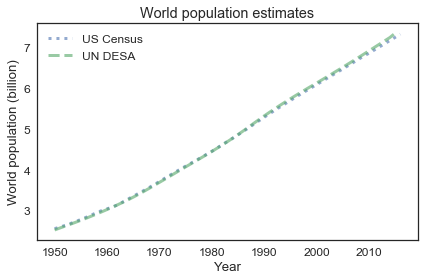

In [4]:
un = table2.un / 1e9
census = table2.census / 1e9
empty = TimeSeries()
empty1 = TimeSeries()
empty2 = TimeSeries()
empty3 = TimeSeries()
plot_results(census, un, empty, empty1, empty2, empty3, 'World population estimates')

# How long would it take to reach carrying capacity if there was a three child limit imposed on the world population?

In [5]:
#For reference; can run, but doesn't do anything 
def ChildLimit():
    NoLimitEq = 17.1875 *x +700
    OneEq = 11.0294 *x +1025
    TwoEq = 7.42*x+1367.82 
    ThreeEq = 12.30375*x + 366.09

In [6]:
def update_func(pop, t, system):
    net_growth = .0157083 * pop
    return pop + net_growth

def update_func1(pop, t, system):
    net_growth = .0112578 * pop 
    return pop + net_growth

def update_func2(pop, t, system):
    net_growth = .00733*pop 
    return pop + net_growth

def update_func3(pop, t, system):
    net_growth = .003141*pop
    return pop + net_growth

In [15]:
def run_simulation(system, update_func):
    results = TimeSeries()
    results1 = TimeSeries()
    results2 = TimeSeries()
    results3 = TimeSeries()
    
    results[system.t_0] = system.p_0
    results1[system.t_0] = system.p_0
    results2[system.t_0] = system.p_0
    results3[system.t_0]= system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] =  update_func(results[t], t, system)
        results1[t+1] =  update_func1(results1[t], t, system)
        results2[t+1] =  update_func2(results2[t], t, system)
        results3[t+1] =  update_func3(results3[t], t, system)
        if results3[t+1] >= 10.0:
            print(t)
    return results

In [16]:
t_0 = get_first_label(census)
t_end = 2500
p_0 = census[t_0]

system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0)

,values
t_0,1950.000000
t_end,2500.000000
p_0,2.557629


2384.0
2385.0
2386.0
2387.0
2388.0
2389.0
2390.0
2391.0
2392.0
2393.0
2394.0
2395.0
2396.0
2397.0
2398.0
2399.0
2400.0
2401.0
2402.0
2403.0
2404.0
2405.0
2406.0
2407.0
2408.0
2409.0
2410.0
2411.0
2412.0
2413.0
2414.0
2415.0
2416.0
2417.0
2418.0
2419.0
2420.0
2421.0
2422.0
2423.0
2424.0
2425.0
2426.0
2427.0
2428.0
2429.0
2430.0
2431.0
2432.0
2433.0
2434.0
2435.0
2436.0
2437.0
2438.0
2439.0
2440.0
2441.0
2442.0
2443.0
2444.0
2445.0
2446.0
2447.0
2448.0
2449.0
2450.0
2451.0
2452.0
2453.0
2454.0
2455.0
2456.0
2457.0
2458.0
2459.0
2460.0
2461.0
2462.0
2463.0
2464.0
2465.0
2466.0
2467.0
2468.0
2469.0
2470.0
2471.0
2472.0
2473.0
2474.0
2475.0
2476.0
2477.0
2478.0
2479.0
2480.0
2481.0
2482.0
2483.0
2484.0
2485.0
2486.0
2487.0
2488.0
2489.0
2490.0
2491.0
2492.0
2493.0
2494.0
2495.0
2496.0
2497.0
2498.0
2499.0
2384.0
2385.0
2386.0
2387.0
2388.0
2389.0
2390.0
2391.0
2392.0
2393.0
2394.0
2395.0
2396.0
2397.0
2398.0
2399.0
2400.0
2401.0
2402.0
2403.0
2404.0
2405.0
2406.0
2407.0
2408.0
2409.0
2410.0

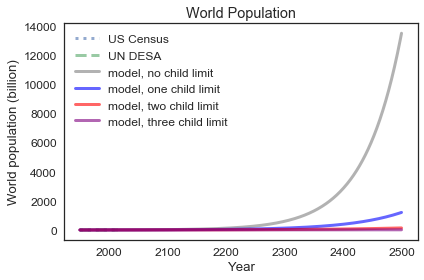

In [17]:
results = run_simulation(system, update_func)
results1 = run_simulation(system, update_func1)
results2 = run_simulation(system, update_func2)
results3 = run_simulation(system, update_func3)
plot_results(census, un, results, results1, results2, results3, 'World Population')
savefig('figs/ModSimProject-fig04.pdf')

This figure shows the results from our model along with world population estimates from the United Nations Department of Economic and Social Affairs (UN DESA) and the US Census Bureau.

The model predicts the population in the shown years if there was a three child limit imposed on the world population. This model extrapolates from data of China's one and two child limits as well as there being a no child limit. This graph obviously doesn't yield the results we expected from applying a three child limit. We think this skewing can be attributed to multiple social factors in china that caused a continued decrease in population growth rate even after the one child limit was removed and the two child limit was imposed. 

This model predicts that the world population would reach our estimated carrying capacities at year 2385.

We made quite a few assumptions during this simulation; many of them were bad. For one, we assumed that China’s data could be extrapolated to the entire world. Additionally, we assumed that there were NO variables other than child limits that would affect China’s growth rate (obviously a bad assumption, but a necessary one in order to make the project feasible). We assumed (definitely falsely) that the global growth rates wouldn’t change from year to year. All of these assumptions were made for the sake of simplicity. If we couldn’t make these assumptions, it would require a much more complex model. 

In future work, ____